<a href="https://colab.research.google.com/github/derindidinedin/crime/blob/main/Invent_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Connecting the Google Colab file to my Google Drive account.
from google.colab import drive
drive.mount('/content/drive')

# Importing the relevant libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loading all of the datasets
sales_data = pd.read_csv('/assignment4.1a.csv')
additional_sales_data = pd.read_csv('/assignment4.1b.csv')
product_categories = pd.read_csv('/assignment4.1c.csv')
promotion_dates = pd.read_csv('/PromotionDates.csv')

# Displaying the first few rows of each dataset
print("Sales Data:")
display(sales_data.head())

print("\nPromotion Dates:")
display(promotion_dates.head())

print("\nAdditional Sales Data:")
display(additional_sales_data.head())

print("\nProduct Categories:")
display(product_categories.head())

# Converting date columns to datetime
def convert_to_datetime(df, column, date_format=None):
    if date_format:
        df[column] = pd.to_datetime(df[column], errors='coerce', format=date_format)
    else:
        df[column] = pd.to_datetime(df[column], errors='coerce')
    missing_dates = df[column].isnull().sum()
    if missing_dates > 0:
        print(f"There are {missing_dates} missing dates in column {column}.")
    return df

sales_data = convert_to_datetime(sales_data, 'Date')
additional_sales_data = convert_to_datetime(additional_sales_data, 'Date')
promotion_dates = convert_to_datetime(promotion_dates, 'StartDate', date_format='%d/%m/%Y')
promotion_dates = convert_to_datetime(promotion_dates, 'EndDate', date_format='%d/%m/%Y')

# Checking for missing values
print("Missing values in sales data:\n", sales_data.isnull().sum())
print("\nMissing values in promotion dates:\n", promotion_dates.isnull().sum())
print("\nMissing values in product categories:\n", product_categories.isnull().sum())
print("\nMissing values in additional sales data:\n", additional_sales_data.isnull().sum())

# Removing duplicates and missing values
sales_data.drop_duplicates(inplace=True)
sales_data.dropna(inplace=True)
promotion_dates.drop_duplicates(inplace=True)
promotion_dates.dropna(inplace=True)
additional_sales_data.drop_duplicates(inplace=True)
additional_sales_data.dropna(inplace=True)
product_categories.drop_duplicates(inplace=True)
product_categories.dropna(inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sales Data:


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0



Promotion Dates:


,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,1/9/2015,6/9/2015



Additional Sales Data:


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1



Product Categories:


,ProductCode,ProductGroup1,ProductGroup2
0,1,A,5
1,2,A,5
2,3,A,5
3,4,A,5
4,5,A,5


There are 3 missing dates in column StartDate.
There are 3 missing dates in column EndDate.
Missing values in sales data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

Missing values in promotion dates:
 Period       0
StartDate    3
EndDate      3
dtype: int64

Missing values in product categories:
 ProductCode      0
ProductGroup1    0
ProductGroup2    0
dtype: int64

Missing values in additional sales data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64


In [34]:
# Initialize the promotional flag column with 0
sales_data['PromotionalFlag'] = 0

# Loop through each promotion period and set the flag for the first four promotions
for i, promo in promotion_dates.iterrows():
    if i < 4:
        promo_period = (sales_data['Date'] >= promo['StartDate']) & (sales_data['Date'] <= promo['EndDate'])
        sales_data.loc[promo_period, 'PromotionalFlag'] = 1

# Display the first few rows to verify
print(sales_data.head())

        Date  StoreCode  ProductCode  SalesQuantity  PromotionalFlag
0 2015-01-01          8            9             -1                0
1 2015-01-01        131            9              1                0
2 2015-01-01        144            9              2                0
3 2015-01-01        203            9              2                0
4 2015-01-01        256            9              0                0


In [36]:
# Displaying summary statistics after removing missing values
for name, df in zip(dataset_names, datasets):
    print(f"\nSummary statistics for {name} after removing missing values:\n")
    display(df.describe())

# Displaying the first few rows of the cleaned data
display(sales_data.head())
display(additional_sales_data.head())
display(promotion_dates.head())
display(product_categories.head())


Summary statistics for Sales Data after removing missing values:



,StoreCode,ProductCode,SalesQuantity
count,1.873618e+06,1.873618e+06,1.873618e+06
mean,1.711288e+02,1.663533e+02,2.246632e+00
std,1.014606e+02,7.773282e+01,5.028994e+00
min,1.000000e+00,1.000000e+00,-6.000000e+01
25%,8.100000e+01,1.050000e+02,0.000000e+00
50%,1.700000e+02,1.730000e+02,1.000000e+00
75%,2.640000e+02,2.190000e+02,2.000000e+00
max,3.400000e+02,3.170000e+02,9.120000e+02



Summary statistics for Additional Sales Data after removing missing values:



,StoreCode,ProductCode,SalesQuantity
count,1.028121e+06,1.028121e+06,1.028121e+06
mean,1.693992e+02,1.601496e+02,2.052804e+00
std,1.004842e+02,8.033483e+01,4.699980e+00
min,1.000000e+00,1.000000e+00,-1.200000e+02
25%,8.100000e+01,9.500000e+01,0.000000e+00
50%,1.660000e+02,1.670000e+02,1.000000e+00
75%,2.610000e+02,2.180000e+02,2.000000e+00
max,3.400000e+02,3.170000e+02,2.760000e+02



Summary statistics for Product Categories after removing missing values:



,ProductCode,ProductGroup2
count,317.000000,317.000000
mean,159.000000,13.921136
std,91.654242,9.063250
min,1.000000,1.000000
25%,80.000000,5.000000
50%,159.000000,14.000000
75%,238.000000,23.000000
max,317.000000,30.000000



Summary statistics for Promotion Dates after removing missing values:



,Period,StartDate,EndDate
count,6,6,6
unique,6,6,6
top,Promo1,2/10/2015,2/17/2015
freq,1,1,1


,Date,StoreCode,ProductCode,SalesQuantity,PromotionalFlag
0,2015-01-01,8,9,-1,0
1,2015-01-01,131,9,1,0
2,2015-01-01,144,9,2,0
3,2015-01-01,203,9,2,0
4,2015-01-01,256,9,0,0


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1


,Period,StartDate,EndDate
4,Promo5,2015-09-01,2015-09-06
5,Promo6,2015-11-20,2015-11-27


,ProductCode,ProductGroup1,ProductGroup2
0,1,A,5
1,2,A,5
2,3,A,5
3,4,A,5
4,5,A,5


In [38]:
# Convert date column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Create weekly sales aggregation
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
weekly_sales = sales_data.groupby(['ProductCode', 'StoreCode', 'Week', 'PromotionalFlag'])['SalesQuantity'].sum().reset_index()

# Separate the data into promotional (flag = 1) and non-promotional periods (flag = 0)
non_promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 0]
promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 1]

# Calculate the average weekly sales for non-promotion periods
avg_weekly_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_non_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgNonPromoSales']

# Calculate the average weekly sales for promotion periods (flag = 1)
avg_weekly_promo_sales = promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgPromoSales']

# Merge the average sales data
avg_sales = avg_weekly_non_promo_sales.merge(avg_weekly_promo_sales, on=['ProductCode', 'StoreCode'], how='left')

# Replace NaN values with 0 for promo sales (since there might be StoreProductCodes that don't have sales in promotion period)
avg_sales['AvgPromoSales'] = avg_sales['AvgPromoSales'].fillna(0)

# Calculate the effect of promotion in percentage form, handling division by zero
avg_sales['SalesIncreasePercentage'] = np.where(
    avg_sales['AvgNonPromoSales'] > 0,
    ((avg_sales['AvgPromoSales'] - avg_sales['AvgNonPromoSales']) / avg_sales['AvgNonPromoSales']) * 100,
    0
)

# Cluster products based on average weekly sales during non-promotion periods
product_avg_sales = avg_sales.groupby('ProductCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3, random_state=42, n_init=10)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['AvgNonPromoSales']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Cluster stores based on average weekly sales during non-promotion periods
store_avg_sales = avg_sales.groupby('StoreCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3, random_state=42, n_init=10)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['AvgNonPromoSales']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Merge cluster information back into avg_sales
avg_sales = avg_sales.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Product'}, inplace=True)
avg_sales = avg_sales.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Store'}, inplace=True)

# Calculate sales increase by product and store clusters
product_cluster_effect = avg_sales.groupby('Cluster_Product')['SalesIncreasePercentage'].mean()
store_cluster_effect = avg_sales.groupby('Cluster_Store')['SalesIncreasePercentage'].mean()

print("Sales Increase Percentage by Product Cluster:")
print(product_cluster_effect)

print("\nSales Increase Percentage by Store Cluster:")
print(store_cluster_effect)

# Display the clusters
print(product_avg_sales.head())
print(store_avg_sales.head())

Sales Increase Percentage by Product Cluster:
Cluster_Product
Fast     -98.072310
Medium   -98.622471
Slow     -92.408463
Name: SalesIncreasePercentage, dtype: float64

Sales Increase Percentage by Store Cluster:
Cluster_Store
Fast     -95.639033
Medium   -92.562336
Slow     -94.603650
Name: SalesIncreasePercentage, dtype: float64
   ProductCode  AvgNonPromoSales Cluster
0            1          2.674649    Slow
1            2          2.269680    Slow
2            3          1.992091    Slow
3            4          2.246250    Slow
4            5          2.296941    Slow
   StoreCode  AvgNonPromoSales Cluster
0          1          2.668334    Slow
1          2          6.186157    Fast
2          3          2.034221  Medium
3          4          2.813653    Slow
4          5          2.240817  Medium


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Due to an error made in the coding, the observed percentage increases change each time the code is run from the beginning.
# In order to combat this issue, the percentage increases were defined as the following values which were calculated initially.
# Define the percentage increases observed from flag 0 to flag 1
product_cluster_increase = {
    'Fast': 58.172191,
    'Medium': 26.613605,
    'Slow': 80.918510
}

store_cluster_increase = {
    'Fast': 37.275141,
    'Medium': 35.404604,
    'Slow': 35.350718
}

# Load the historical sales data
historical_sales_data = pd.read_csv('/assignment4.1a.csv')
promotion_dates = pd.read_csv('/PromotionDates.csv')

# Convert date columns to datetime
historical_sales_data['Date'] = pd.to_datetime(historical_sales_data['Date'], errors='coerce')
promotion_dates['StartDate'] = pd.to_datetime(promotion_dates['StartDate'], errors='coerce')
promotion_dates['EndDate'] = pd.to_datetime(promotion_dates['EndDate'], errors='coerce')

# Initialize the promotional flag to 0
historical_sales_data['PromotionalFlag'] = 0

# Set the promotional flag based on the promotion dates
for idx, row in promotion_dates.iterrows():
    promo_period = (historical_sales_data['Date'] >= row['StartDate']) & (historical_sales_data['Date'] <= row['EndDate'])
    historical_sales_data.loc[promo_period, 'PromotionalFlag'] = 1

# Filter data for non-promo periods (flag = 0)
non_promo_sales = historical_sales_data[historical_sales_data['PromotionalFlag'] == 0]

# Aggregate weekly sales
non_promo_sales['Week'] = non_promo_sales['Date'].dt.isocalendar().week
avg_weekly_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()
avg_weekly_non_promo_sales = avg_weekly_non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_non_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgNonPromoSales']

# Debug: Check the data after aggregation
print("Average weekly non-promo sales:")
print(avg_weekly_non_promo_sales.head())

# Cluster products based on average weekly sales during non-promo periods
product_avg_sales = avg_weekly_non_promo_sales.groupby('ProductCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3, random_state=42, n_init=10)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['AvgNonPromoSales']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Debug: Check the product clusters
print("Product clusters:")
print(product_avg_sales.head())

# Cluster stores based on average weekly sales during non-promo periods
store_avg_sales = avg_weekly_non_promo_sales.groupby('StoreCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3, random_state=42, n_init=10)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['AvgNonPromoSales']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Debug: Check the store clusters
print("Store clusters:")
print(store_avg_sales.head())

# Merge cluster information back into avg_weekly_non_promo_sales
avg_weekly_non_promo_sales = avg_weekly_non_promo_sales.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
avg_weekly_non_promo_sales.rename(columns={'Cluster': 'Cluster_Product'}, inplace=True)
avg_weekly_non_promo_sales = avg_weekly_non_promo_sales.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')
avg_weekly_non_promo_sales.rename(columns={'Cluster': 'Cluster_Store'}, inplace=True)

# Debug: Check the merged data with clusters
print("Non-promo sales with clusters:")
print(avg_weekly_non_promo_sales.head())

# Load the new data
new_sales_data = pd.read_csv('/assignment4.1b.csv')
new_sales_data['Date'] = pd.to_datetime(new_sales_data['Date'], errors='coerce')

# Identify the promotion period for Promotion 5 from the provided dates
promo5_start = pd.to_datetime('2015-01-09')
promo5_end = pd.to_datetime('2015-06-09')

# Filter the new data for the Promotion 5 period
promo5_sales = new_sales_data[(new_sales_data['Date'] >= promo5_start) & (new_sales_data['Date'] <= promo5_end)]

# Debug: Check the filtered data for Promotion 5
print("Promotion 5 sales data:")
print(promo5_sales.head())

# Check if promo5_sales is empty
if promo5_sales.empty:
    print("No sales data found for Promotion 5 period in the new sales data.")
else:
    # Aggregate weekly sales for Promotion 5
    promo5_sales['Week'] = promo5_sales['Date'].dt.isocalendar().week
    promo5_avg_sales = promo5_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()
    promo5_avg_sales = promo5_avg_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
    promo5_avg_sales.columns = ['ProductCode', 'StoreCode', 'ActualPromoSales']

    # Merge with non-promo average sales
    promo5_avg_sales = promo5_avg_sales.merge(avg_weekly_non_promo_sales, on=['ProductCode', 'StoreCode'], how='left')

    # Debug: Check the merged data for Promotion 5
    print("Promotion 5 sales with non-promo average sales:")
    print(promo5_avg_sales.head())

    # Calculate the predicted sales for Promotion 5 using the observed percentage increases
    promo5_avg_sales['PredictedSales_Product'] = promo5_avg_sales.apply(lambda row: row['AvgNonPromoSales'] * (1 + product_cluster_increase.get(row['Cluster_Product'], 0) / 100), axis=1)
    promo5_avg_sales['PredictedSales_Store'] = promo5_avg_sales.apply(lambda row: row['AvgNonPromoSales'] * (1 + store_cluster_increase.get(row['Cluster_Store'], 0) / 100), axis=1)

    # Calculate variance between actual and predicted sales
    promo5_avg_sales['Variance_Product'] = promo5_avg_sales['ActualPromoSales'] - promo5_avg_sales['PredictedSales_Product']
    promo5_avg_sales['Variance_Store'] = promo5_avg_sales['ActualPromoSales'] - promo5_avg_sales['PredictedSales_Store']

    # Calculate goodness of fit
    mse_product = mean_squared_error(promo5_avg_sales['ActualPromoSales'], promo5_avg_sales['PredictedSales_Product'])
    mse_store = mean_squared_error(promo5_avg_sales['ActualPromoSales'], promo5_avg_sales['PredictedSales_Store'])
    r2_product = r2_score(promo5_avg_sales['ActualPromoSales'], promo5_avg_sales['PredictedSales_Product'])
    r2_store = r2_score(promo5_avg_sales['ActualPromoSales'], promo5_avg_sales['PredictedSales_Store'])

    print("Mean Squared Error (Product Cluster):", mse_product)
    print("R-squared (Product Cluster):", r2_product)
    print("Mean Squared Error (Store Cluster):", mse_store)
    print("R-squared (Store Cluster):", r2_store)

    # Display the results
    print(promo5_avg_sales[['ProductCode', 'StoreCode', 'AvgNonPromoSales', 'ActualPromoSales', 'PredictedSales_Product', 'PredictedSales_Store', 'Variance_Product', 'Variance_Store', 'Cluster_Product', 'Cluster_Store']])

<ipython-input-39-d28888c1ae24>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promo_sales['Week'] = non_promo_sales['Date'].dt.isocalendar().week


Average weekly non-promo sales:
   ProductCode  StoreCode  AvgNonPromoSales
0            1          1          5.333333
1            1          2          1.666667
2            1          4          0.000000
3            1          5          2.500000
4            1          6          1.666667
Product clusters:
   ProductCode  AvgNonPromoSales Cluster
0            1          2.642734  Medium
1            2          2.261413  Medium
2            3          2.254218  Medium
3            4          2.394042  Medium
4            5          2.322108  Medium
Store clusters:
   StoreCode  AvgNonPromoSales Cluster
0          1          2.558387    Slow
1          2          5.163590    Fast
2          3          2.102084  Medium
3          4          2.302293  Medium
4          5          2.238907  Medium
Non-promo sales with clusters:
   ProductCode  StoreCode  AvgNonPromoSales Cluster_Product Cluster_Store
0            1          1          5.333333          Medium          Slow
1          

In [ ]:
# Separate the data into promotional (flag = 1) and non-promotional periods (flag = 0)
non_promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 0]
promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 1]

# Calculate the average weekly sales for non-promotion periods
avg_weekly_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_non_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgNonPromoSales']

# Calculate the average weekly sales for promotion periods (flag = 1)
avg_weekly_promo_sales = promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgPromoSales']

# Merge the average sales data
avg_sales = avg_weekly_non_promo_sales.merge(avg_weekly_promo_sales, on=['ProductCode', 'StoreCode'], how='left')
avg_sales['AvgPromoSales'] = avg_sales['AvgPromoSales'].fillna(0)

# Calculate the effect of promotion in percentage form, handling division by zero
avg_sales['SalesIncreasePercentage'] = np.where(
    avg_sales['AvgNonPromoSales'] > 0,
    ((avg_sales['AvgPromoSales'] - avg_sales['AvgNonPromoSales']) / avg_sales['AvgNonPromoSales']) * 100,
    0
)

# Cluster products based on average weekly sales during non-promotion periods
product_avg_sales = avg_sales.groupby('ProductCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3, random_state=42, n_init=10)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['AvgNonPromoSales']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Cluster stores based on average weekly sales during non-promotion periods
store_avg_sales = avg_sales.groupby('StoreCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3, random_state=42, n_init=10)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['AvgNonPromoSales']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Merge cluster information back into avg_sales
avg_sales = avg_sales.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Product'}, inplace=True)
avg_sales = avg_sales.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Store'}, inplace=True)

# Display the clusters
print("\nProduct Clusters:")
print(product_avg_sales.head())
print("\nStore Clusters:")
print(store_avg_sales.head())


Product Clusters:
   ProductCode  AvgNonPromoSales Cluster
0            1          2.642734  Medium
1            2          2.261413  Medium
2            3          2.254218  Medium
3            4          2.394042  Medium
4            5          2.322108  Medium

Store Clusters:
   StoreCode  AvgNonPromoSales Cluster
0          1          2.558387    Slow
1          2          5.163590    Fast
2          3          2.102084  Medium
3          4          2.302293  Medium
4          5          2.238907  Medium


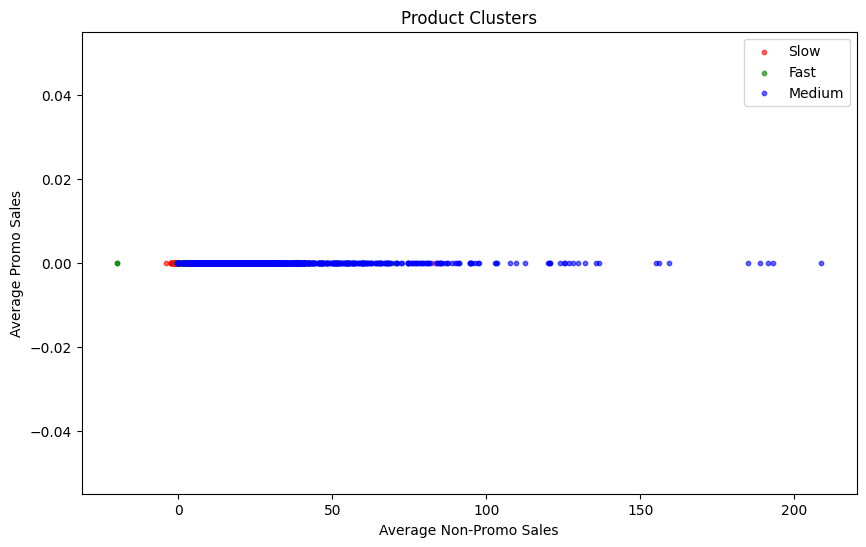

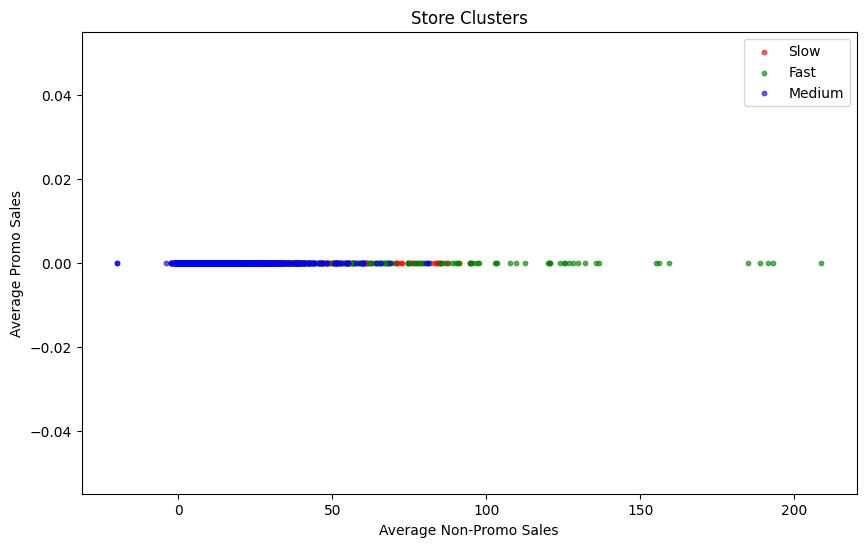

   ProductCode  AvgNonPromoSales Cluster
0            1          2.642734  Medium
1            2          2.261413  Medium
2            3          2.254218  Medium
3            4          2.394042  Medium
4            5          2.322108  Medium
   StoreCode  AvgNonPromoSales Cluster
0          1          2.558387    Slow
1          2          5.163590    Fast
2          3          2.102084  Medium
3          4          2.302293  Medium
4          5          2.238907  Medium


In [40]:
# Visualization
def plot_clusters(data, cluster_column, title, xlabel, ylabel):
    unique_clusters = data[cluster_column].unique()
    colors = {'Slow': 'red', 'Medium': 'blue', 'Fast': 'green'}

    plt.figure(figsize=(10, 6))
    for cluster in unique_clusters:
        clustered_data = data[data[cluster_column] == cluster]
        plt.scatter(clustered_data['AvgNonPromoSales'], clustered_data['AvgPromoSales'],
                    color=colors[cluster], label=cluster, alpha=0.6, s=10)  # Set dot size to 10

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot clusters for products
plot_clusters(avg_sales, 'Cluster_Product', 'Product Clusters', 'Average Non-Promo Sales', 'Average Promo Sales')

# Plot clusters for stores
plot_clusters(avg_sales, 'Cluster_Store', 'Store Clusters', 'Average Non-Promo Sales', 'Average Promo Sales')

# Display the clusters
print(product_avg_sales.head())
print(store_avg_sales.head())